**Team: Arnobio Morelix, Mihir Sathe, Sameed Musvee and Shangyun Lv** 

**Executive Summary**
1. In this notebook, we start with importing libraries, the data, and just understanding the dataset via an EDA with many visualizations.
2. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, the Kaggle competition asked us to predict the final price of each home.

**Sections**
1. Exploratory Data Analysis (EDA)
2. Data Cleaning and Transformation
3. Linear Regression and Principal Component Analysis (PCA)
4. Random Forest and Gradient Boosting

In [1]:
%matplotlib inline

# General libraries.

#New libraries for RandomForestRegressor
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# SK-learn libraries
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display

#from pydotplus import graph_from_dot_data
#New libraries for RandomForestRegressor
from pandas_summary import DataFrameSummary
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation, metrics
import graphviz

C:\Users\smusvee\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\smusvee\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from fastai.imports import *
from fastai.structured import *

In [3]:
# #import data
# df_train = pd.read_csv("all/train.csv")
# df_test = pd.read_csv("all/test.csv")

# df_train = pd.read_csv('./train.csv')
df_train = pd.read_csv("train.csv")

In [4]:
## Make sure to run this so that modeling section below works.

df_train_other = df_train.copy() ## This is for the section after EDA

# 1. Exploratory Data Analysis (EDA)

In [5]:
print("The data shape is %s." %str(df_train.shape))

The data shape is (1460, 81).


In [6]:
## We can see the type of each attribute below.

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
## We see below that there are many variables that have null values. We address this in our Transformation section
## By putting in dummy variables or 0s.

#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
## Summary of Sales Price variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


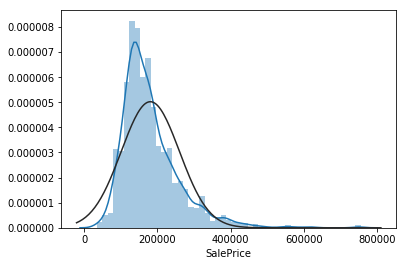

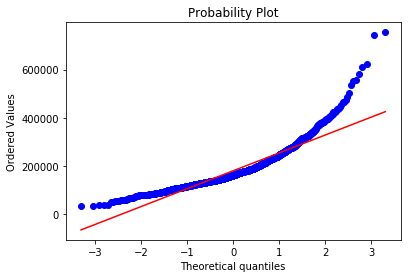

In [9]:
## We can see from the histogram below and the summary above that Sale Price is right skewed.
## This is expected since as with income, we anticipate there to be a few outlying high home prices.

# histogram and normal probability plot of dependent variable, SalePrice
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


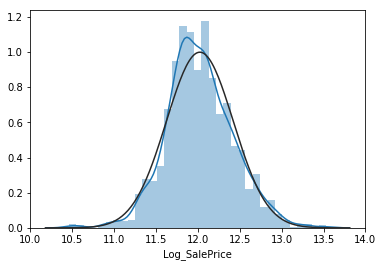

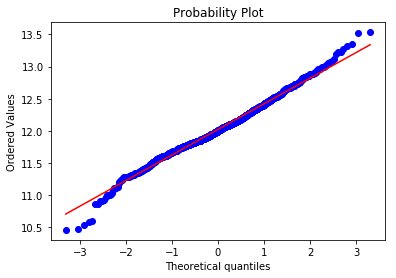

In [11]:
## To adjust for the right skew, we take the log transformation of Sale Price and see that it gives
## us a far more normal distribution. We will use this log transformed Sale Price several times 
## throughout our analysis.

# applying log transformation
df_train['Log_SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['Log_SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Log_SalePrice'], plot=plt)

print("Skewness: %f" % df_train['Log_SalePrice'].skew())
print("Kurtosis: %f" % df_train['Log_SalePrice'].kurt())

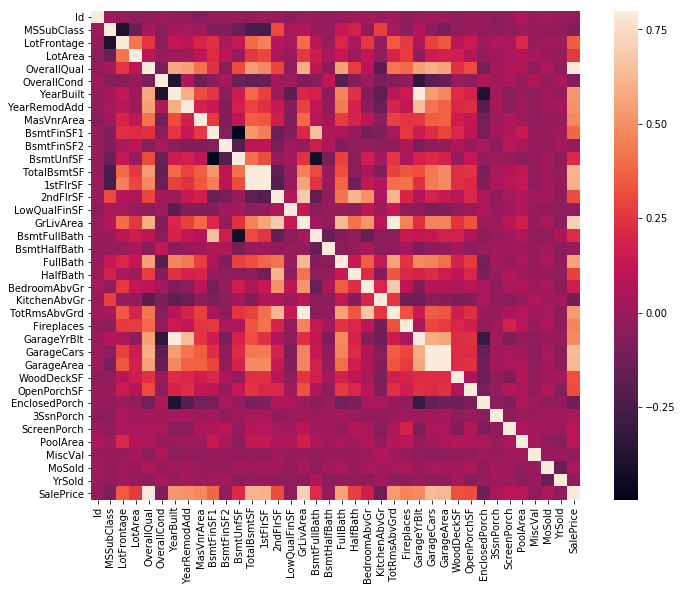

In [10]:
# Correlation heatmap
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

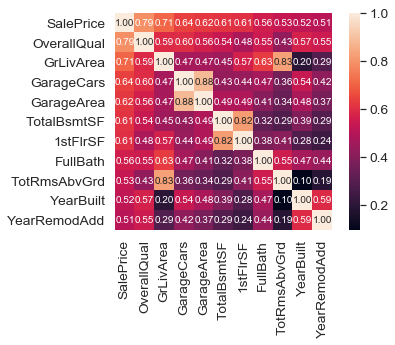

In [14]:
## The heatmap below includes the 10 variables with the highest correlation to Sale Price.
## Adjust k to change the number of variables included.

# saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#There are 10 numeric variables with a correlation of at least 0.5 with SalePrice

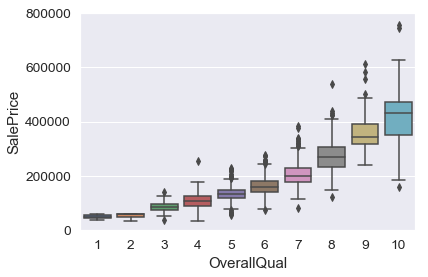

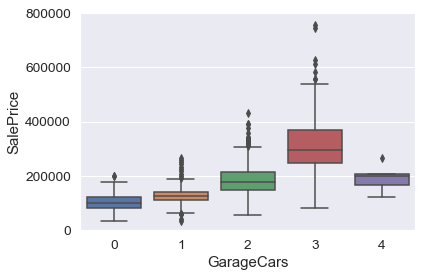

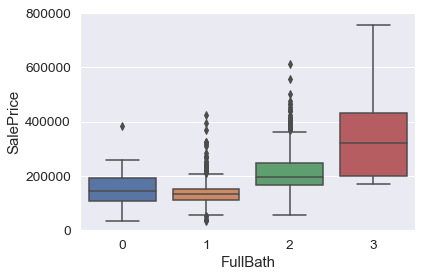

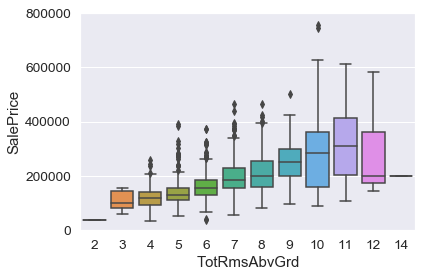

In [15]:
## This plot can be used to examine ordinal variables against Sale Price.
## The example below shows the ordinal variables out of the top 10 correlated attributes against Sale Price

## box plot overallqual/saleprice
vars = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

for var in vars:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(6, 4))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.show()

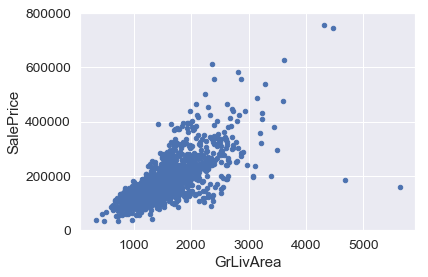

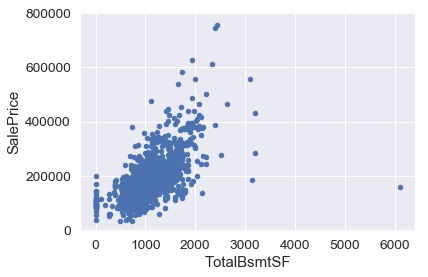

In [16]:
## From the below to plots we can see the bivariate relationship between price and above ground/basement living spaces
## There is a strong correlation, which is expected.

#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

plt.show()

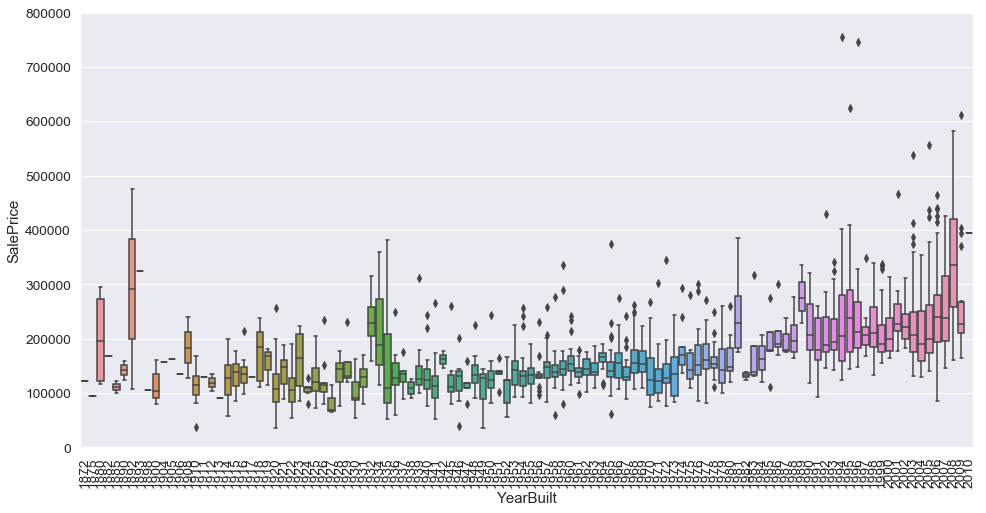

In [17]:
## Sale price vs year built.  We see that there isn't a strong correlation between the two
## which is surprising since we'd think that a newer house would be valued higher.

var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [19]:
# #scatterplot
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(df_train[cols], size = 2.5)
# plt.show();

# 2. Data Cleaning and Transformation
## Some key functions

In [21]:
def create_dummies(df, colname):
    for col in colname:
        dummies = pd.get_dummies(df[col], prefix = col)   
        df = df.drop(col, axis=1)
        df = df.join(dummies)
    return df

def transform(df):
    # Create dummy variables
    dummy_list = ['MSZoning','Street','Alley','Neighborhood','Condition1',
              'Condition2','RoofStyle','RoofMatl','Exterior1st',
              'Exterior2nd','MasVnrType','Foundation','Heating',
            'Electrical','GarageType','MiscFeature','SaleType',
              'SaleCondition']
    df = create_dummies(df, dummy_list)
    
    #Create ordinal variables
    ordinal_map_dict = {
    'LotShape': {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
    'LandContour': {'Lvl':4, 'Bnk':3, 'HLS':2,'Low':1,},
    'Utilities': {'AllPub':4, 'NoSeWr':3,'NoSeWa':2,'ELO':1},
    'LotConfig': {'Inside':1, 'FR2':4, 'Corner':2, 'CulDSac':3, 'FR3':5},
    'LandSlope': {'Gtl':3, 'Mod':2, 'Sev':1},
    'BldgType': {'1Fam':5, '2fmCon':4, 'Duplex':3, 'TwnhsE':2, 'Twnhs':1},
    'HouseStyle': {'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7,
                   'SLvl':8, '2.5Unf':5, '2.5Fin':6},
    'ExterQual': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'ExterCond': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'BsmtQual': {'Gd':90, 'TA':80, 'Ex':100, 'Fa':70, 'Po':60},
    'BsmtCond': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'BsmtExposure': {'No':1, 'Gd':4, 'Mn':2, 'Av':3},
    'BsmtFinType1': {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2},
    'BsmtFinType2': {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2},
    'HeatingQC': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'CentralAir': {'Y':1, 'N':0},
    'KitchenQual': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'Functional': {'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2},
    'FireplaceQu': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'GarageFinish': {'RFn':2, 'Unf':1, 'Fin':3},
    'GarageQual': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'GarageCond': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'PavedDrive': {'Y':2, 'N':0, 'P':1},
    'PoolQC': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1},
    'Fence': {'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1}
    }
    df = df.replace(ordinal_map_dict)
    
    #Fill Na
    df = df.fillna(0)
    
    #Move SalePrice to the end
    cols = list(df)
    if 'SalePrice' in cols:
        cols.append(cols.pop(cols.index('SalePrice')))
        df = df.loc[:,cols]
        
    #Pop column ID
    if "Id" in cols:
        df.pop("Id")
    
    return df


def transform2(df):
    # Create dummy variables
    dummy_list = ['MSZoning','Street','Alley','Neighborhood','Condition1',
              'Condition2','RoofStyle','RoofMatl','Exterior1st',
              'Exterior2nd','MasVnrType','Foundation','Heating',
            'Electrical','GarageType','MiscFeature','SaleType',
              'SaleCondition','LotShape','LandContour','Utilities',
            'LotConfig','LandSlope','BldgType','HouseStyle',
                'ExterQual','ExterCond','BsmtQual','BsmtCond',
                  'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                  'CentralAir','KitchenQual','Functional','FireplaceQu',
                  'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
    df = create_dummies(df, dummy_list)
    
    #Fill Na
    df = df.fillna(0)
    
    #Move SalePrice to the end
    cols = list(df)
    if 'SalePrice' in cols:
        cols.append(cols.pop(cols.index('SalePrice')))
        df = df.loc[:,cols]
    
    #Pop column ID
    if "Id" in cols:
        df.pop("Id")

    return df


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# 3. Linear Regression and Principal Component Analysis (PCA)

In [22]:
## Transform the original dataset by creating dummy and ordinal variables

trans_df = transform(df_train_other)
# trans_df.pop("Id") ## Remove ID since it has no bearing on price
trans_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,4,4,4,1,3,5,4,...,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,4,4,4,4,3,5,1,...,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,3,4,4,1,3,5,4,...,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,3,4,4,2,3,5,4,...,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,3,4,4,4,3,5,4,...,0,0,1,0,0,0,0,1,0,250000


In [23]:
# split data table into data X and labels y

X = trans_df.iloc[:,0:-1].values
Y = trans_df.iloc[:,-1].values

#### Standard Linear Regression without PCA

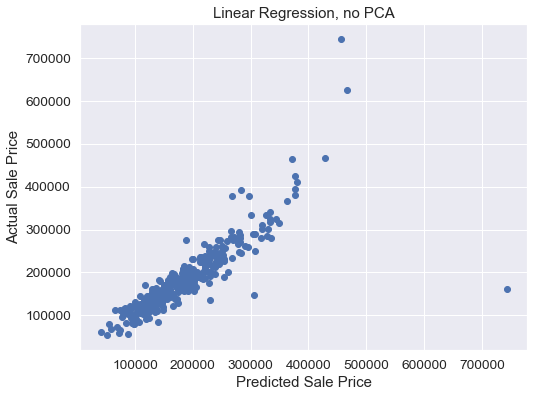

Mean accuracy...20632.278503624686 	RMSE...43290.3599121521 	Regression score... 0.6997049670671163


In [24]:
## Split out data for simple linear regression
lr_train_data, lr_train_labels = X[:1100], Y[:1100]
lr_dev_data, lr_dev_labels = X[1100:], Y[1100:]

## Fit lr using the train data and labels taken above, predict dev data.
lr = LinearRegression()
lr.fit(lr_train_data, lr_train_labels)
prediction = lr.predict(lr_dev_data)

## Distance of actuals vs predictors
accuracy = abs(prediction - lr_dev_labels)

## Plots prediction vs actual sale price
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(prediction, lr_dev_labels)
plt.title("Linear Regression, no PCA")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.show()

## Print out the mean accuracy, rmse, and lr score.
print("Mean accuracy...%s \tRMSE...%s \tRegression score... %s" \
    %(accuracy.mean(), rmse(prediction, lr_dev_labels), lr.score(lr_dev_data, lr_dev_labels)))

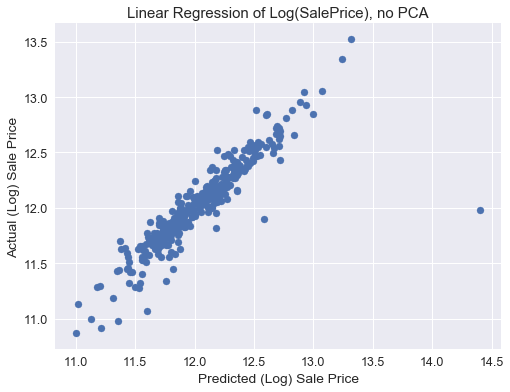

Mean accuracy...19107.326709053836 	RMSE...89500.51818616048 	Regression score... 0.7989557025693481


In [22]:
## set e to math.e
e = math.e

## set log train and log dev labels to be used below
log_train_labels, log_dev_labels = np.log(lr_train_labels), np.log(lr_dev_labels)

## Same as above but with logged sale price as our labels
lr = LinearRegression()
lr.fit(lr_train_data, log_train_labels)
prediction = lr.predict(lr_dev_data)

accuracy = abs(e**prediction - lr_dev_labels)

f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(prediction, log_dev_labels)
plt.title("Linear Regression of Log(SalePrice), no PCA")
plt.xlabel("Predicted (Log) Sale Price")
plt.ylabel("Actual (Log) Sale Price")
plt.show()

print("Mean accuracy...%s \tRMSE...%s \tRegression score... %s" \
    %(accuracy.mean(), rmse(e**prediction, lr_dev_labels), lr.score(lr_dev_data, log_dev_labels)))

#### PCA

In [25]:
# Prepare the data
#trans_df = transform(raw_df)
# trans_df = transform2(raw_df)

X = trans_df.iloc[:,0:-1].values
Y = trans_df.iloc[:,-1].values

# Standardize data
X_std = StandardScaler().fit_transform(X)
train_data, train_labels = X_std[:1100], Y[:1100]
dev_data, dev_labels = X_std[1100:], Y[1100:]

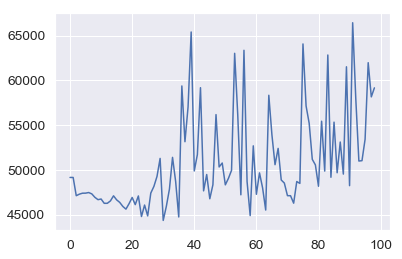

In [26]:
rmse_list = []
for com in range(1,100):
    pca = PCA(n_components=com)
    pca.fit(X_std)
    # print(pca.explained_variance_ratio_)
#     plt.plot(pca.explained_variance_ratio_)
    
    train_pca = pca.transform(train_data)
    dev_pca = pca.transform(dev_data)
    
    lr_pca = LinearRegression()
    lr_pca.fit(train_pca, train_labels)
    
    pred_dev = lr_pca.predict(dev_pca)
#     plt.scatter(pred_dev, dev_labels) #This is overlaying 100 scatterplots onto one.
    rmse_list.append(rmse(pred_dev, dev_labels))

plt.plot(rmse_list)

In [27]:
min_rmse = min(rmse_list)
n_com = rmse_list.index(min_rmse)+1
print('The best n_components is %d and according RMSE is %.2f.'%(n_com, min_rmse))

The best n_components is 31 and according RMSE is 44349.17.


### Summary for two different transformation with Linear Regression

    Transform: Dummy+ordinal    No.comp = 57    RMSE = 44798
    Transform2: Only Dummy    No.comp = 43   RMSE = 38430

- Thoughts
    - A lot of unjustifiable assumptions are added to the data when creating ordinal variables;
    - in transform2 Even though converting all non-numeric variables into dummy variables generate a lot more variables than the first method, no unnecessary assumptions are added;
    - Finally PCA is able to bring down the number of variables for the model.

Another way of looking and understanding the variables is measuring how each of them drive the variance among observations, and their joint contribution to that variance, using PCA.

Below are how our results look like for that:

Total variance explained by  10 components: 0.26797638419656145
Total variance explained by  20 components: 0.39248144495603865
Total variance explained by  30 components: 0.4904770261751045
Total variance explained by  40 components: 0.5725506643875194
Total variance explained by  50 components: 0.6442156723367327
Total variance explained by  75 components: 0.7865316404250223
Total variance explained by  100 components: 0.8874212774533983
Total variance explained by  125 components: 0.9539096670487709
Total variance explained by  150 components: 0.9899373705263804


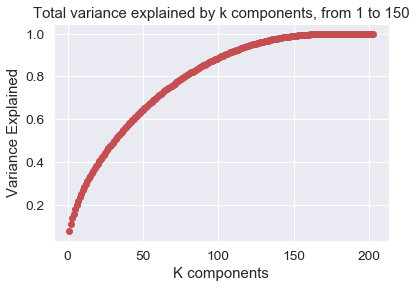

In [28]:
# PCA
var_each = []
var_sum = []

model = PCA()
model.fit_transform(train_data)
for k in range(203):
    var = model.explained_variance_[k]/sum(model.explained_variance_)
    var_each.extend([var])
    if k == 0:
        var_sum.extend([var])
    else:
        var_sum.extend([(var+var_sum[k-1])])
        if k == 9:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 19:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 29:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 39:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 49:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 74:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 99:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 124:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])
        if k == 149:
            print('Total variance explained by ', k+1, 'components:', var_sum[k])


plt.plot(range(1, 204), var_sum, 'ro')
plt.ylabel('Variance Explained')
plt.xlabel('K components')
plt.title('Total variance explained by k components, from 1 to 150')
plt.show()

# 4. Random Forest and Gradient Boosting

A first pass Random Forest model gets better results (as measured by RMSE) than our linear regression models.

**'Vanilla'  Random Forest Model**

In [29]:
# defining train and dev data
train_data, train_labels = X[:1100], Y[:1100]
dev_data, dev_labels = X[1100:], Y[1100:]

# running random forests model
model = RandomForestRegressor(random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('Vanilla  Random Forest Model')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

Vanilla  Random Forest Model

 	 Mean Absolute Error: 21272.319166666668

 	 Root Mean Square Error: 34820.96933349892


**Random Forest Model with Standardized Variables**

In [30]:
# Standardize data
X_std = StandardScaler().fit_transform(X)
train_data, train_labels = X_std[:1100], Y[:1100]
dev_data, dev_labels = X_std[1100:], Y[1100:]
# running random forests model
model = RandomForestRegressor(random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('Random Forest Model with Standardized Variables')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

Random Forest Model with Standardized Variables

 	 Mean Absolute Error: 21447.141111111112

 	 Root Mean Square Error: 35212.16398319778


**Random Forest Model, Testing Different Number of Decision Trees**

In [31]:
# defining train and dev data
train_data, train_labels = X[:1100], Y[:1100]
dev_data, dev_labels = X[1100:], Y[1100:]

# running random forests model, 100 trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('\n \n Random Forest Model with 100 Decision Trees')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

# running random forests model, 250 trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('\n \n Random Forest Model with 250 Decision Trees')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

# running random forests model, 500 trees
model = RandomForestRegressor(n_estimators = 500, random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('\n \n Random Forest Model with 500 Decision Trees')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

# running random forests model, 1000 trees
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('\n \n Random Forest Model with 1000 Decision Trees')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))

# running random forests model, 2000 trees
model = RandomForestRegressor(n_estimators = 2000, random_state = 42)
model.fit(train_data, train_labels)
train_predicted_labels = model.predict(dev_data)

print('\n \n Random Forest Model with 2000 Decision Trees')
print("\n \t Mean Absolute Error:", mean_absolute_error(dev_labels, train_predicted_labels))
print("\n \t Root Mean Square Error:", rmse(train_predicted_labels, dev_labels))


 
 Random Forest Model with 100 Decision Trees

 	 Mean Absolute Error: 18805.32988888889

 	 Root Mean Square Error: 33593.92202852591

 
 Random Forest Model with 250 Decision Trees

 	 Mean Absolute Error: 18560.431733333335

 	 Root Mean Square Error: 33573.93193952759

 
 Random Forest Model with 500 Decision Trees

 	 Mean Absolute Error: 18482.0795

 	 Root Mean Square Error: 33045.377578976164

 
 Random Forest Model with 1000 Decision Trees

 	 Mean Absolute Error: 18487.75858888889

 	 Root Mean Square Error: 33276.959128434195

 
 Random Forest Model with 2000 Decision Trees

 	 Mean Absolute Error: 18465.26405

 	 Root Mean Square Error: 33444.63894713281


### Functions

In [32]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
# Function to find out the lot frontage value with the highest occurence in each neighborhood
def mode(df, key_cols, value_col, count_col):
    return df.groupby(key_cols + [value_col]).size().to_frame(count_col).reset_index() \
             .sort_values(count_col, ascending=False).drop_duplicates(subset=key_cols)

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [33]:
print(trans_df.shape)
trans_df.head()

(1460, 204)


,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,4,4,4,1,3,5,4,...,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,4,4,4,4,3,5,1,...,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,3,4,4,1,3,5,4,...,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,3,4,4,2,3,5,4,...,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,3,4,4,4,3,5,4,...,0,0,1,0,0,0,0,1,0,250000


In [34]:
#Training Categories #uses fastai package
train_cats(trans_df)

In [35]:
#proc_df takes the dataframe and returns:
#1 - the df + columns with _na at the end if they contain na values
#2 - a y column as a label set
#3 - a dictionary of na values
df, y, nas = proc_df(trans_df, 'SalePrice', max_n_cat = 15)

In [36]:
#Find age of a house that was sold recently
trans_df['Age'] = trans_df['YrSold'] - trans_df['YearBuilt']
#df_combined.drop(['YearBuilt', 'YrSold'], axis = 1, inplace = True)

In [37]:
#Changing to sub class as object type
trans_df.MSSubClass = trans_df.MSSubClass.astype('object')

In [38]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
tree.fit(df,y)
tree.score (df,y)

0.2191780821917808

In [39]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=1)
tree.fit(df,y)
tree.score (df,y)

0.8034246575342465

In [40]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=40, random_state=1)
tree.fit(df,y)
tree.score (df,y)

1.0

As the max depth of the tree increases, we face a problem of over fitting. To solve this, we  now look at Random Forests i.e. an ensemble of decision trees. The Random Forest algorithm consists of 4 key steps
1. Draw a random bootstrap sample of size n
2. Grow a decision tree from the bootstrap sample
3. Repeat the step 1-2k times
4. Aggregate the prediction by each tree to assign the class label by majority vote

In [41]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(df, y)
rf.score(df,y)

0.9731999997083061

Using the default of 10 trees, we get a ~97% training accuracy which is again misleading as there is likely over fitting on the train test that will not generalize well. So we now divide the training data into a training set and a validation set

In [42]:
n_valid = 500  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(trans_df, n_trn)
x_train, x_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

x_train.shape, y_train.shape, x_valid.shape

((960, 203), (960,), (500, 203))

Below is how training is performed using only one tree with a maximum depth of 3

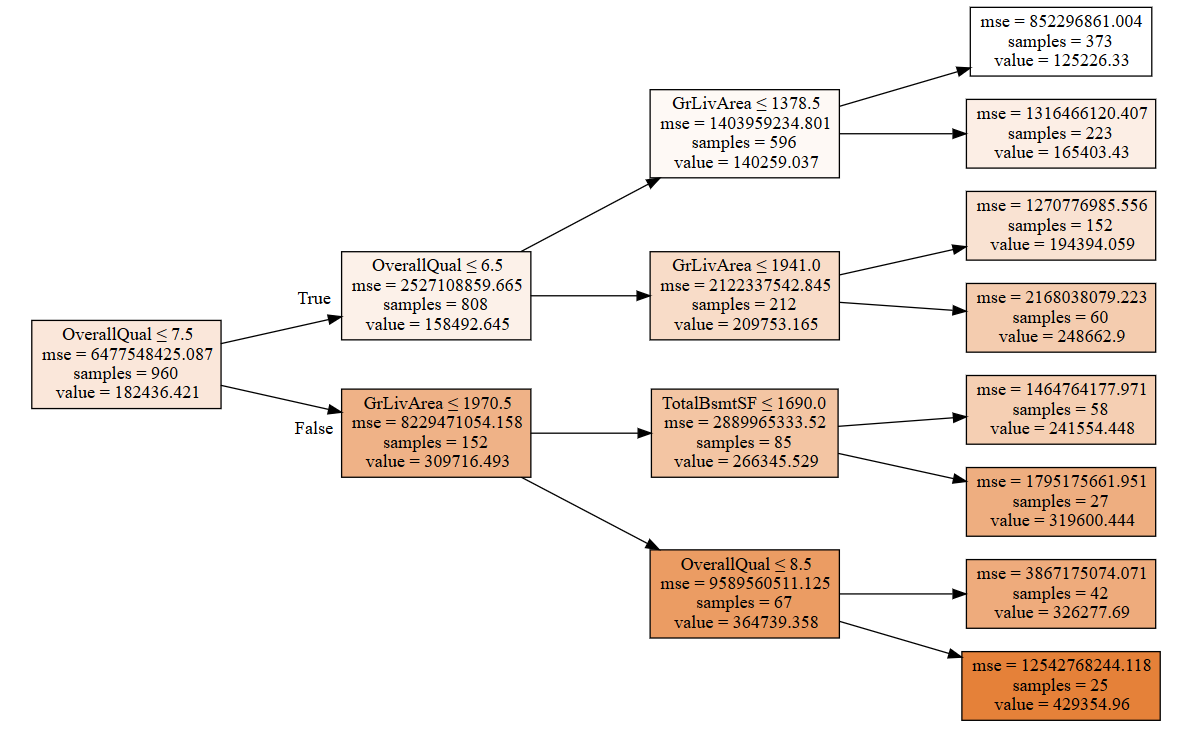

Random Forest Regressor uses the below formula to evaluate all the features for the best split. The best split is the one that gives the least weighted mean square error between actual price of the samples and the predicted price in the nodes it split into. The predicted price is just the average of the prices of all the samples in that node.

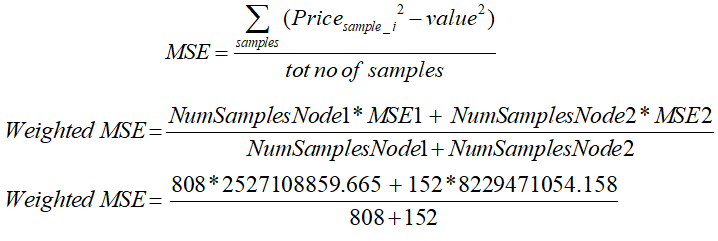

In [65]:
# Formula to printing accuracy and RMSE 
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(rf):
    res = [rmse(rf.predict(x_train), y_train)]
    print(res)

In [66]:
# A RandomForestRegressor with tuned parameters and cross validation performed on the training set
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
cv_score_rf = cross_validation.cross_val_score(rf, x_train, y_train, cv=5)

In [67]:
np.mean(cv_score_rf)

0.826842818588907

In [68]:
print_score(rf) #RMSE in Dollars

[12380.155593446632]


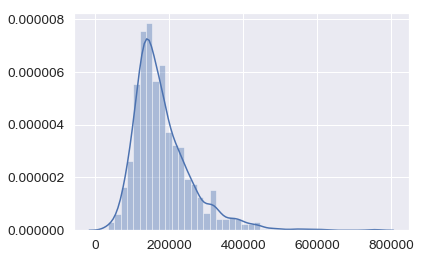

In [69]:
# As seen in the EDA, the data appears to be skewed to the left 
sns.distplot(y_train)

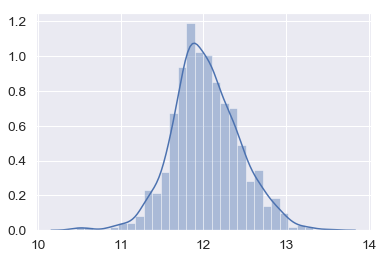

In [70]:
# So we log Transformation on SalePrice 
y = np.log(y_train)

sns.distplot(y) #now more normally distrbuted

In [71]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
cv_score_rf = cross_validation.cross_val_score(rf, x_train, y, cv=5)

In [72]:
np.mean(cv_score_rf) #improvement to score

0.8428918338043729

In [73]:
print_score(rf) #RMSE is Dollars

[12418.53224762794]


Decision tree after applying log transformation to the sales price. The log transformation helps the Forest in splitting the nodes of the trees more evenly. The first node splits into 596 and 364 samples respectively, as opposed to 808 and 152 earlier. This increases the validation accuracy to ~85%

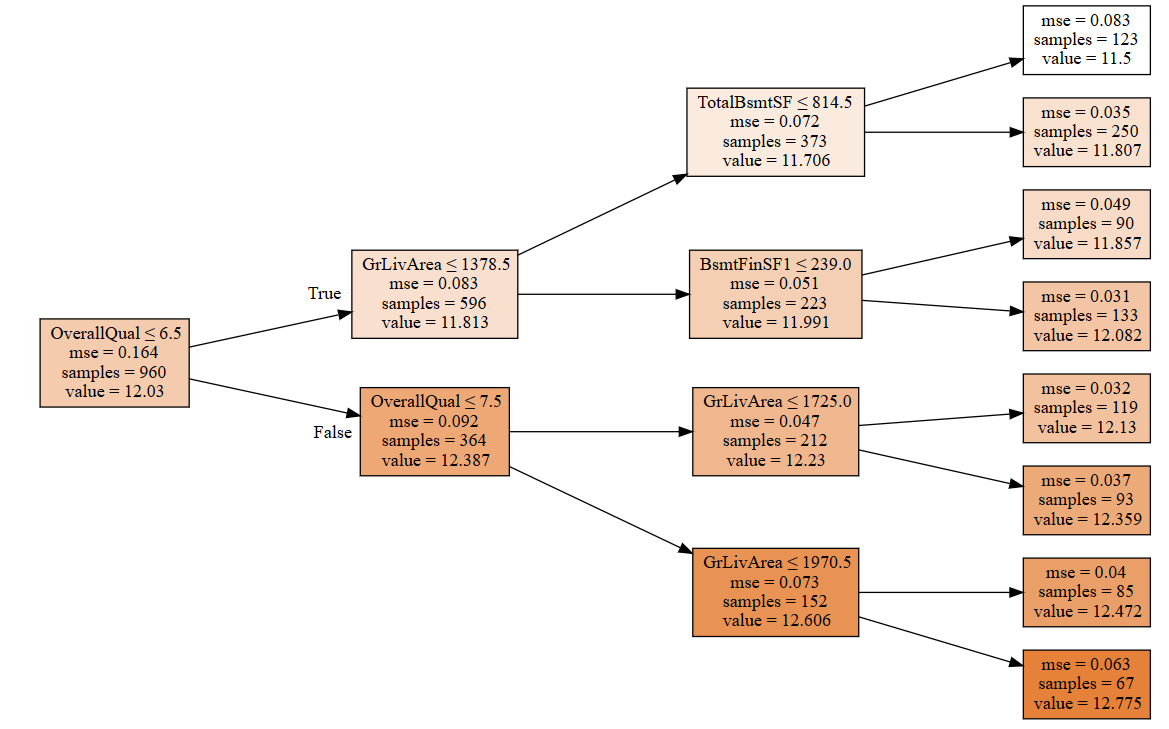

In [74]:
%time rf.fit(x_train, y_train)

Wall time: 178 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

We did a Gradient Boosting Regressor with tuned parameters and cross validation on the training set
1. Gradient Boosting Regressors are trees that function on boosting.
2. Boosting is a mechanism in which samples which were not fit well in a tree are given higher probability to be utilized in the next tree
3. In this way, the algorithm focuses on increasing accuracy of prediction on all samples sequentially
4. Boosting takes advantage of weak learners and perfects them one by one

In [75]:
gbm = GradientBoostingRegressor(min_samples_split = 0.001, min_samples_leaf = 20,max_depth = 30,max_features = 0.5,subsample = 1.0)
gbm.fit(x_train, y_train)
cv_score_gbm = cross_validation.cross_val_score(gbm, x_train, y)

In [76]:
np.mean(cv_score_gbm) #Highest score so far

0.8868293233937014

In [78]:
print_score(gbm) #RMSE is Dollars. This is the lowest value of all our models

[11834.278732847959]


Now that all the feature processing is done, model tuning is carried out. The first sample in the validation set scores ~84%. Adding more trees doesn't increase the accuracy much as it stabilizes and saturates

In [79]:
preds = np.stack([t.predict(x_valid) for t in rf.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([129900., 127500., 130250., 109500., 109000., 124000.,  88000., 100000., 124000., 142500.]),
 118465.0,
 116500)

In [80]:
preds.shape

(10, 500)

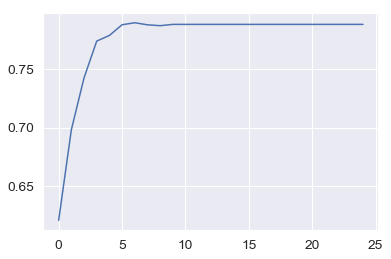

In [81]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(25)]);

Using some over fitting combatment methods specified earlier and about 600 trees, the Random Forest gave an accuracy of ~89% for the validation set. We can go one step further and plot those features that are important for deciding the Sale Price of a house

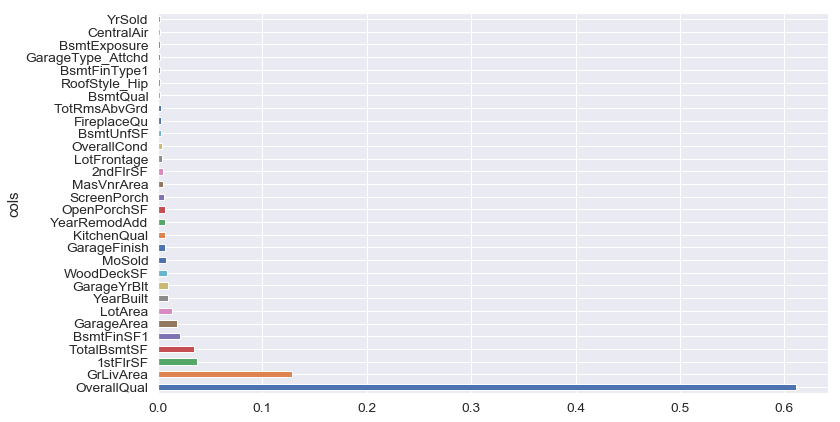

In [82]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(rf, x_train); fi[:30]
plot_fi(fi[:30])

In [83]:
rf_fi = rf_feat_importance(rf, x_train)
to_keep_rf = rf_fi[rf_fi.imp > 0.002].cols
x_train_rf_keep = x_train[to_keep_rf].copy()
x_train_rf_keep.shape

(960, 25)

In [84]:
rf_new = RandomForestRegressor(n_jobs=-1, max_features = 0.5, min_samples_leaf = 2)
rf_new.fit(x_train[to_keep_rf], y)
cv_score_rf_new = cross_validation.cross_val_score(rf_new, x_train_rf_keep, y, cv=5)

In [85]:
np.mean(cv_score_rf_new) #improvment to the score

0.8547725586841903

In [88]:
#Keeping only important features from Gradient Boosting Model
gbm_fi = rf_feat_importance(gbm, x_train)
to_keep_gbm = gbm_fi[gbm_fi.imp > 0.002].cols
x_train_gbm_keep = x_train[to_keep_gbm].copy()
x_train_gbm_keep.shape

(960, 49)

In [89]:
gbm.fit(x_train[to_keep_gbm], y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=30, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=0.001, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [90]:
cv_score_gbm_new = cross_validation.cross_val_score(rf, x_train_gbm_keep, y, cv=5)

In [91]:
# We don't see an improvement here possibly because Gradient Boosting models sequentially work on those samples
# that didn't fit well in previous trees, hence, all features are utilized more optimally in boosting
np.mean(cv_score_gbm_new)

0.8485143714289773

In [92]:
# We will use the first GBM model to predict the SalePrice of the pre-processed test data since it achieved the 
# highest accuracy of all models
#output = gbm.predict(x_train)
output = gbm.predict(x_train_gbm_keep)